# Homework 1

`airbnb.csv` 데이터셋은 airbnb에 등록된 샌프란시스코 지역의 listing 데이터의 일부이다. 

- 'id': listing id
- 'room_type': 집 또는 방의 형태 (entire home/apt, private room, shared room)
- 'number_of_reviews': 총 리뷰 수
- 'review_scores_rating': 전체 리뷰 점수 
- 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value': 각 부분의 리뷰 점수
- 'reviews_per_month': 월 평균 리뷰 수 
- 'Downtown': Downtown까지의 거리 
- 'PerCapitaIncome': 해당 지역의 소득수준
- 'most_freq_aspect': listing description에서 가장 많이 나타난 주제

아래의 질문에 답하기 위해 적절한 통계량/그래프를 출력하고 서술하시오. 완성된 답안은 **html** 파일로 다운받아 제출하시오. (File>Download as>HTML)


In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### 1. 데이터가 포함한 각 변수의 종류를 구분하시오.

In [2]:
airbnb_dataset = pd.read_csv('./dataset/airbnb.csv')
airbnb_dataset.head()

,id,room_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Downtown,PerCapitaIncome,most_freq_aspect
0,958,Entire home/apt,222.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.77,4068.132073,110777,int_style
1,3850,Private room,167.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.33,6792.053605,93008,comm
2,5858,Entire home/apt,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,5666.128342,69778,nature
3,7918,Private room,18.0,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,5573.866947,99041,comm
4,8142,Private room,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,5632.882874,99041,comm


### 범주형 데이터
- 순서척도
    - 'id': listing id
- 명목척도
    - 'room_type': 집 또는 방의 형태 (entire home/apt, private room, shared room)
    - 'most_freq_aspect': listing description에서 가장 많이 나타난 주제
    
    
    
### 수치형 데이터 
- 'number_of_reviews': 총 리뷰 수
- 'reviews_per_month': 월 평균 리뷰 수

- 이산형
  - 'review_scores_rating': 전체 리뷰 점수 
    - 'review_scores_accuracy', 'review_scores_cleanliness',
      'review_scores_checkin', 'review_scores_communication',
      'review_scores_location', 'review_scores_value': 각 부분의 리뷰 점수
- 연속형 
    - 'Downtown': Downtown까지의 거리 
    - 'PerCapitaIncome': 해당 지역의 소득수준



#### 2. `reviews_per_month`의 평균, 중위수를 계산하고 비교하여 분포의 모양을 추측해보시오. 

In [3]:
print("reviews_per_month  Mean: %.2f, Median: %.2f" %(airbnb_dataset['reviews_per_month'].mean(), airbnb_dataset['reviews_per_month'].median()))


reviews_per_month  Mean: 1.89, Median: 1.03


### 모양 추측
    -   오른쪽 꼬리가 긴 모양

#### 3. `reviews_per_month`의 히스토그램을 통해 위에서 추측한 사실이 맞는지 확인해보시오. 

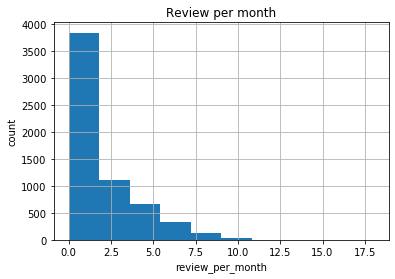

In [4]:
ax = airbnb_dataset.reviews_per_month.hist(bins=10)
ax.set_xlabel("review_per_month")
ax.set_ylabel("count")
ax.set_title("Review per month")
plt.show()

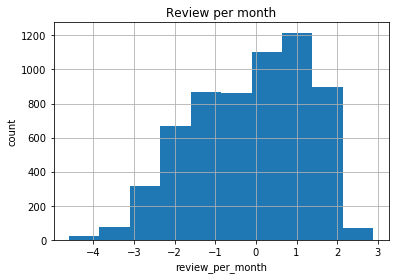

In [5]:
data = np.log(airbnb_dataset.reviews_per_month)
ax = data.hist()
ax.set_xlabel("review_per_month")
ax.set_ylabel("count")
ax.set_title("Review per month")
plt.show()

In [6]:
mu = data.mean()
std = data.std()
mu-2*std, mu+2*std

(-2.9202600561693703, 2.675248373944573)

#### 4. `reviews_per_month`의 평균과 중위수를 각 `room_type`별로 계산하여 비교하시오.

In [7]:
room_type = ['Entire home/apt','Private room','Shared room']
mean_list = []
median_list = []
for name in room_type:
    mean = round(airbnb_dataset.groupby('room_type').get_group(name)['reviews_per_month'].mean(),4)
    median = round(airbnb_dataset.groupby('room_type').get_group(name)['reviews_per_month'].median(),4)
    mean_list.append(mean)
    median_list.append(median)
    print(name,'Mean',mean,"Median",median)


Entire home/apt Mean 1.5308 Median 0.75
Private room Mean 2.4349 Median 1.815
Shared room Mean 1.6359 Median 0.735


#### 5. `reviews_per_month`의 Boxplot을  `room_type`별로 그려서 비교하시오.

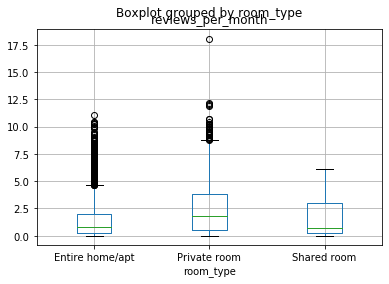

In [8]:
airbnb_dataset.boxplot(by='room_type',column='reviews_per_month')

#### 6. `most_freq_aspect`의 도수분포표를 출력하고 이를 활용해 bar plot을 그려서 어떤 aspect가 가장 빈번하게 나타났는지 확인하시오.

In [9]:
most_freq_aspect_list = ['attr_trans','bedroom','bldg','comm','facil','int_style','kitchen','nature','nbhd','visitor']

airbnb_dataset.most_freq_aspect= airbnb_dataset.most_freq_aspect.astype('category')
airbnb_dataset.most_freq_aspect.cat.categories = most_freq_aspect_list

In [10]:
airbnb_dataset.most_freq_aspect.value_counts(sort=False)

attr_trans     658
bedroom        326
bldg           911
comm          1187
facil          498
int_style      802
kitchen        204
nature         357
nbhd           683
visitor        479
Name: most_freq_aspect, dtype: int64

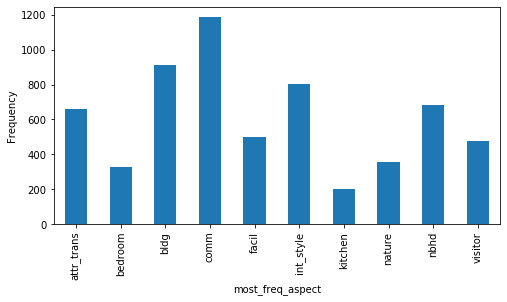

In [11]:
ax = airbnb_dataset.most_freq_aspect.value_counts(sort=False).plot.bar(figsize=(8,4))
ax.set_xlabel('most_freq_aspect')
ax.set_ylabel('Frequency')
plt.show()

#### 7. `room_type`과 `most_freq_aspect`의 mosaic plot을 통해 room type에 따라 자주 나타나는 aspect의 특징이 다른지 비교하시오.

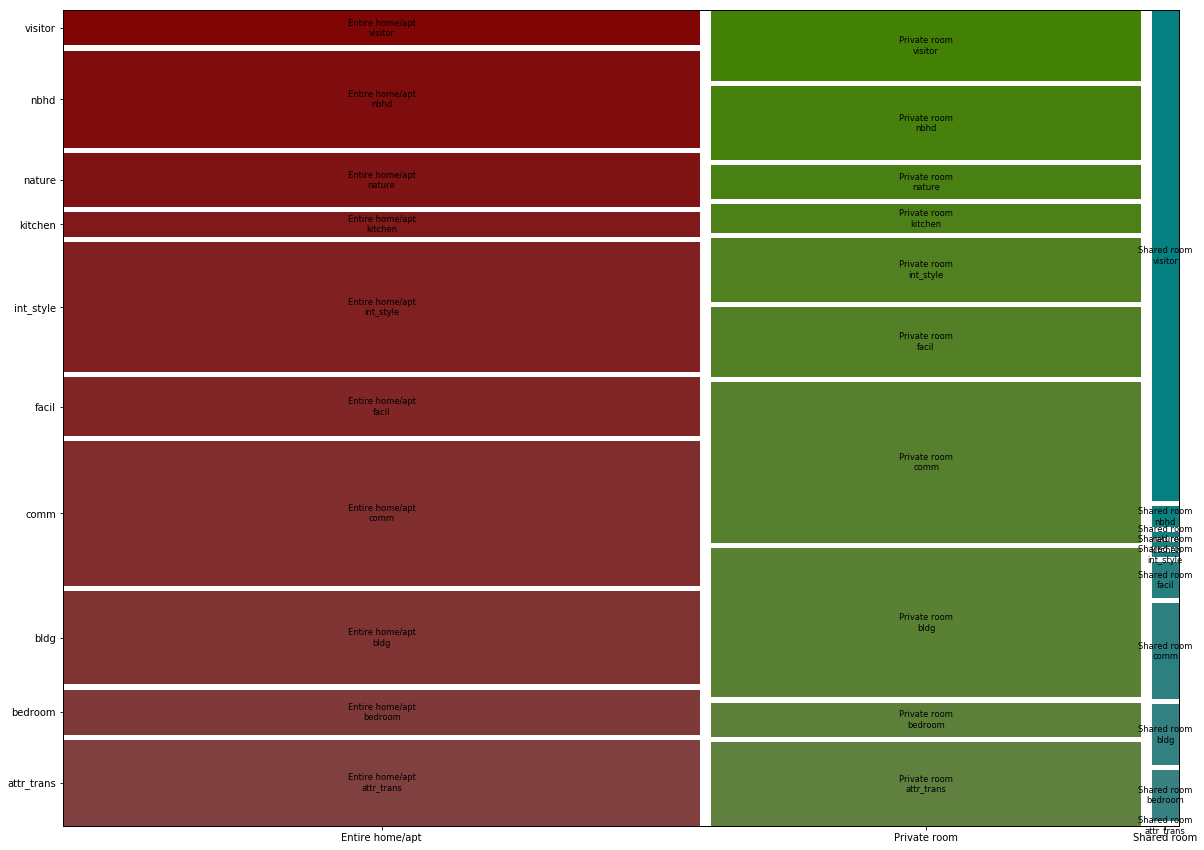

In [12]:
plt.rcParams['figure.figsize'] = [20,15]
from statsmodels.graphics.mosaicplot import mosaic
mosaic(airbnb_dataset.sort_values('most_freq_aspect'), ['room_type', 'most_freq_aspect'],gap = 0.01 )
plt.show()
# plot sort 정렬해서 하기

### 특징
#### room type 중 Share room 의 경우 Visitor가 자주 이용하며 Entire home/apt 와 Private room의 경우 comm 이 많이 이용한다.

#### 8. 7개의 review_scores 변수들과 `Downtown`, `PerCapitaIncome`, `reviews_per_month` 변수와의 상관계수 행렬과 그것의 heatmap을 통해 변수들 간의 상관관계를 관찰하고 서술하시오.

In [13]:
import seaborn as sns

In [14]:
corv = airbnb_dataset.loc[:,'review_scores_rating':'PerCapitaIncome'].corr()

In [15]:
corvariance = corv.drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_value','review_scores_checkin','review_scores_communication','review_scores_location'],axis=1)
corvariance = corvariance.drop(['reviews_per_month',"Downtown",'PerCapitaIncome'])

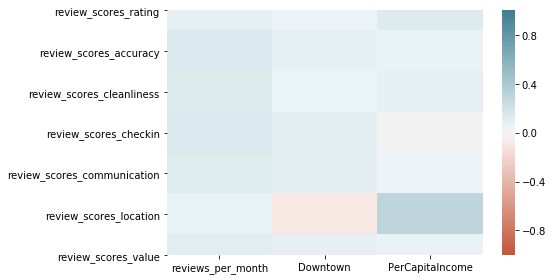

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.heatmap(corvariance,vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,as_cmap=True),ax=ax)
plt.tight_layout()
plt.show()

- review_per_month
   - Review score 대부분이 상관관계가 0.4 이하 이므로 대부분의 Score는 상관관계가 낮다
- DownTown
   - Review score 중 review_scores_location 변수가 가장 낮은 상관관계를 보인다. 이로써 관련성이 가장 낮다
- PerCapitalncome
   - Review score 중 review_scores_location 변수가 가장 높은 상관관계를 보인다. 이로써 관련성이 가장 높다